In [44]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from api_keys import g_key

In [45]:
file = '1_2.csv'
df = pd.read_csv(file)

file1 = '3coord.csv'
df1 = pd.read_csv(file1)

file2 = '4coord.csv'
df2 = pd.read_csv(file2)

file4 = '5coord.csv'
df4 = pd.read_csv(file4)

file5 = '6coord.csv'
df5 = pd.read_csv(file5)

file6 = '7coord.csv'
df6 = pd.read_csv(file6)

file7 = '8coord.csv'
df7 = pd.read_csv(file7)

file8 = '9.csv'
df8 = pd.read_csv(file8)

file9 = '10.csv'
df9 = pd.read_csv(file9)


In [61]:
new_df = pd.concat([df,df1,df2,df4,df5,df6,df7,df8,df9], join='outer')
new_df.head()
new_df = new_df.drop(columns=['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','Unnamed: 0.1.1.1','region_2'])
new_df['year'] = new_df['title']


new_df


,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,Lat,Lng,heat weights,year
0,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,41.387933,-7.276971,7.0,Quinta dos Avidagos 2011 Avidagos Red (Douro)
1,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,40.089829,-88.248177,7.0,Rainstorm 2013 Pinot Gris (Willamette Valley)
2,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,42.212252,-85.891725,7.0,St. Julian 2013 Reserve Late Harvest Riesling ...
3,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,42.343889,-71.101111,7.0,Sweet Cheeks 2012 Vintner's Reserve Wild Child...
4,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,32.905753,-117.230246,7.0,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12092,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),NaN,NaN,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...
12093,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,NaN,NaN,NaN,Citation 2004 Pinot Noir (Oregon)
12094,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,NaN,NaN,NaN,Domaine Gresser 2013 Kritt Gewurztraminer (Als...
12095,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,NaN,NaN,NaN,Domaine Marcel Deiss 2012 Pinot Gris (Alsace)


In [47]:
new_df['year'] = new_df['year'].str.extract('(\d+)')

In [ ]:
new_Df.to_csv('winedf')

In [48]:
group_var_df = new_df.groupby(new_df['variety'])
group_mean = group_df.mean()
group_mean_price = group_mean.sort_values(by='price')
group_mean_points = group_mean.sort_values(by='points')
group_mean_price

,points,price,Lat,Lng,heat weights
variety,,,,,
Malagouzia-Chardonnay,86.000000,8.000000,37.225606,-95.716202,6.000000
Macabeo-Moscatel,85.000000,8.000000,39.929755,-3.012023,5.000000
Shiraz-Tempranillo,82.000000,8.500000,35.779821,-58.875590,2.000000
Johannisberg Riesling,86.571429,8.857143,43.358398,-106.955701,6.571429
Airen,81.666667,9.000000,41.538212,-2.911664,1.666667
...,...,...,...,...,...
Tinta Negra Mole,92.000000,112.000000,40.049679,-76.120398,12.000000
Malbec-Cabernet,91.666667,113.333333,16.631590,-77.746702,11.666667
Debit,89.000000,130.000000,35.321151,-106.196968,9.000000


In [49]:
group_mean_points

,points,price,Lat,Lng,heat weights
variety,,,,,
Chancellor,80.500000,16.0,40.394104,-81.916138,0.500000
Gragnano,81.000000,16.0,42.963611,-78.742778,1.000000
Airen,81.666667,9.0,41.538212,-2.911664,1.666667
Picapoll,82.000000,21.0,41.864185,1.972414,2.000000
Aidani,82.000000,27.0,43.679592,-114.362361,2.000000
...,...,...,...,...,...
Sercial,94.000000,50.0,39.063792,-78.065266,14.000000
Riesling-Chardonnay,94.000000,40.0,40.945028,-72.277470,14.000000
Bual,94.200000,110.0,37.960880,-88.655828,14.200000


In [50]:
group_pnt_df = new_df.groupby(new_df['points'])

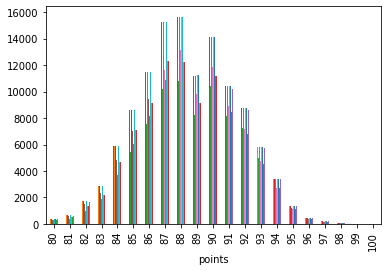

In [51]:
group_pnt = group_pnt_df.count()
group_pnt.plot(kind='bar',legend=False)

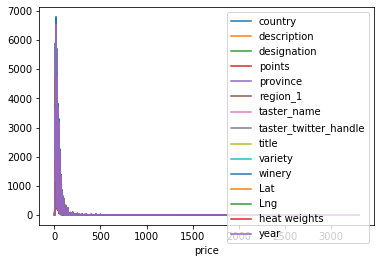

In [52]:
group_prc_df = new_df.groupby(new_df['price'])
group_price = group_prc_df.count()
group_price.plot()